In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore') 

import platform
platform.system()

# 운영체제별 한글 폰트 설정
if platform.system() == 'Darwin': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')

plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정


# 글씨 선명하게 출력하는 설정
%config InlineBackend.figure_format = 'retina'

In [2]:
df = pd.read_csv('./train.csv', encoding = 'utf-8')
df.head()

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
0,C2483,900,아파트,경상북도,국민임대,39.72,134,38.0,A,15667000,103680,0.0,3.0,1425.0,1015.0
1,C2483,900,아파트,경상북도,국민임대,39.72,15,38.0,A,15667000,103680,0.0,3.0,1425.0,1015.0
2,C2483,900,아파트,경상북도,국민임대,51.93,385,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
3,C2483,900,아파트,경상북도,국민임대,51.93,15,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
4,C2483,900,아파트,경상북도,국민임대,51.93,41,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0


## 유형별 임대주택 설계 시 단지 내 적정 🅿️ 주차 수요를 예측

[등록차량수]가 타겟
1. 단지내주차면수 대비 등록차량수의 차이가 얼마나 나는지 
2. 단지별 특성에 따른 등록차량수의 차이
3. 지역적 특성 고려 (인구/소득/성비 등)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2952 entries, 0 to 2951
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   단지코드                          2952 non-null   object 
 1   총세대수                          2952 non-null   int64  
 2   임대건물구분                        2952 non-null   object 
 3   지역                            2952 non-null   object 
 4   공급유형                          2952 non-null   object 
 5   전용면적                          2952 non-null   float64
 6   전용면적별세대수                      2952 non-null   int64  
 7   공가수                           2952 non-null   float64
 8   자격유형                          2952 non-null   object 
 9   임대보증금                         2383 non-null   object 
 10  임대료                           2383 non-null   object 
 11  도보 10분거리 내 지하철역 수(환승노선 수 반영)  2741 non-null   float64
 12  도보 10분거리 내 버스정류장 수            2948 non-null   float64
 13  단지내

In [7]:
df.describe()

,총세대수,전용면적,전용면적별세대수,공가수,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
count,2952.000000,2952.000000,2952.000000,2952.000000,2741.000000,2948.000000,2952.000000,2952.000000
mean,886.661247,44.757215,102.747967,12.921070,0.176578,3.695726,601.668360,559.768293
std,513.540168,31.874280,132.640159,10.778831,0.427408,2.644665,396.407072,433.375027
min,26.000000,12.620000,1.000000,0.000000,0.000000,0.000000,13.000000,13.000000
25%,513.500000,32.100000,14.000000,4.000000,0.000000,2.000000,279.250000,220.000000
50%,779.000000,39.930000,60.000000,11.000000,0.000000,3.000000,517.000000,487.000000
75%,1106.000000,51.562500,144.000000,20.000000,0.000000,4.000000,823.000000,770.000000
max,2568.000000,583.400000,1865.000000,55.000000,3.000000,20.000000,1798.000000,2550.000000


In [64]:
df.isnull().sum()
# null 데이터 확인 필요 
# 보증금 데이터에 null값이 대량 존재함

단지코드                              0
총세대수                              0
임대건물구분                            0
지역                                0
공급유형                              0
전용면적                              0
전용면적별세대수                          0
공가수                               0
자격유형                              0
임대보증금                           569
임대료                             569
도보 10분거리 내 지하철역 수(환승노선 수 반영)    211
도보 10분거리 내 버스정류장 수                4
단지내주차면수                           0
등록차량수                             0
주차수요차이                            0
dtype: int64

In [68]:
df[df['임대보증금'].isnull()]

# null포함 데이터 따로 분석 필요
# null 데이터 처리 방향 고민

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수,주차수요차이
88,C1925,601,상가,강원도,임대상가,32.10,1,9.0,D,NaN,NaN,0.0,4.0,117.0,75.0,42.0
89,C1925,601,상가,강원도,임대상가,32.10,1,9.0,D,NaN,NaN,0.0,4.0,117.0,75.0,42.0
90,C1925,601,상가,강원도,임대상가,32.10,1,9.0,D,NaN,NaN,0.0,4.0,117.0,75.0,42.0
91,C1925,601,상가,강원도,임대상가,72.16,1,9.0,D,NaN,NaN,0.0,4.0,117.0,75.0,42.0
101,C1874,619,상가,충청남도,임대상가,12.62,1,2.0,D,NaN,NaN,NaN,2.0,97.0,62.0,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2333,C1350,1401,아파트,대전광역시,공공분양,74.94,22,2.0,D,NaN,NaN,NaN,6.0,1636.0,2315.0,-679.0
2334,C1350,1401,아파트,대전광역시,공공분양,84.94,164,2.0,D,NaN,NaN,NaN,6.0,1636.0,2315.0,-679.0
2335,C1350,1401,아파트,대전광역시,공공분양,84.94,19,2.0,D,NaN,NaN,NaN,6.0,1636.0,2315.0,-679.0
2336,C1350,1401,아파트,대전광역시,공공분양,84.96,26,2.0,D,NaN,NaN,NaN,6.0,1636.0,2315.0,-679.0


In [8]:
df.columns

Index(['단지코드', '총세대수', '임대건물구분', '지역', '공급유형', '전용면적', '전용면적별세대수', '공가수',
       '자격유형', '임대보증금', '임대료', '도보 10분거리 내 지하철역 수(환승노선 수 반영)',
       '도보 10분거리 내 버스정류장 수', '단지내주차면수', '등록차량수'],
      dtype='object')

In [46]:
pd.DataFrame(df['총세대수'].value_counts())

,총세대수
1755,48
2428,47
1005,41
2424,40
1486,37
...,...
372,2
472,2
1350,2
512,1


In [16]:
pd.DataFrame(df.value_counts())

0
단지코드  총세대수 임대건물구분 지역    공급유형 전용면적  전용면적별세대수 공가수  자격유형 임대보증금    임대료    도보 10분거리 내 지하철역 수(환승노선 수 반영) 도보 10분거리 내 버스정류장 수 단지내주차면수 등록차량수    
C1244 1722 아파트    경기도   국민임대 46.81 76       10.0 A    43990000 304540 0.0                          10.0               1483.0  1804.0  2
C2621 1396 아파트    대전광역시 영구임대 26.37 20       26.0 C    5787000  79980  1.0                          4.0                277.0   133.0   2
C1592 870  아파트    강원도   국민임대 36.55 60       13.0 A    12387000 172190 0.0                          5.0                763.0   739.0   2
C2066 757  아파트    대구광역시 국민임대 46.90 50       22.0 B    20439000 167230 0.0                          2.0                660.0   503.0   2
                                   63       22.0 B    20439000 167230 0.0                          2.0                660.0   503.0   2
...                                                                                                                                  ..
C1663 642  아파트    대전광역시 국민임대 51.96 167      3.0  A    17362000 231540 1.0                          5.0                567.0   700.0   1
                             51.91 84       3.0  A    17362000 231540 1.0                          5.0                567.0   700.0   1
                             51.86 178      3.0  A    17362000 231540 1.0                          5.0                567.0   700.0   1
C1660 718  아파트    경상남도  국민임대 59.99 120      13.0 A    24297000 145780 0.0                          3.0                550.0   512.0   1
C2692 499  아파트    경상북도  국민임대 51.59 60       19.0 A    22138000 159700 0.0                          2.0                409.0   437.0   1

[2264 rows x 1 columns]

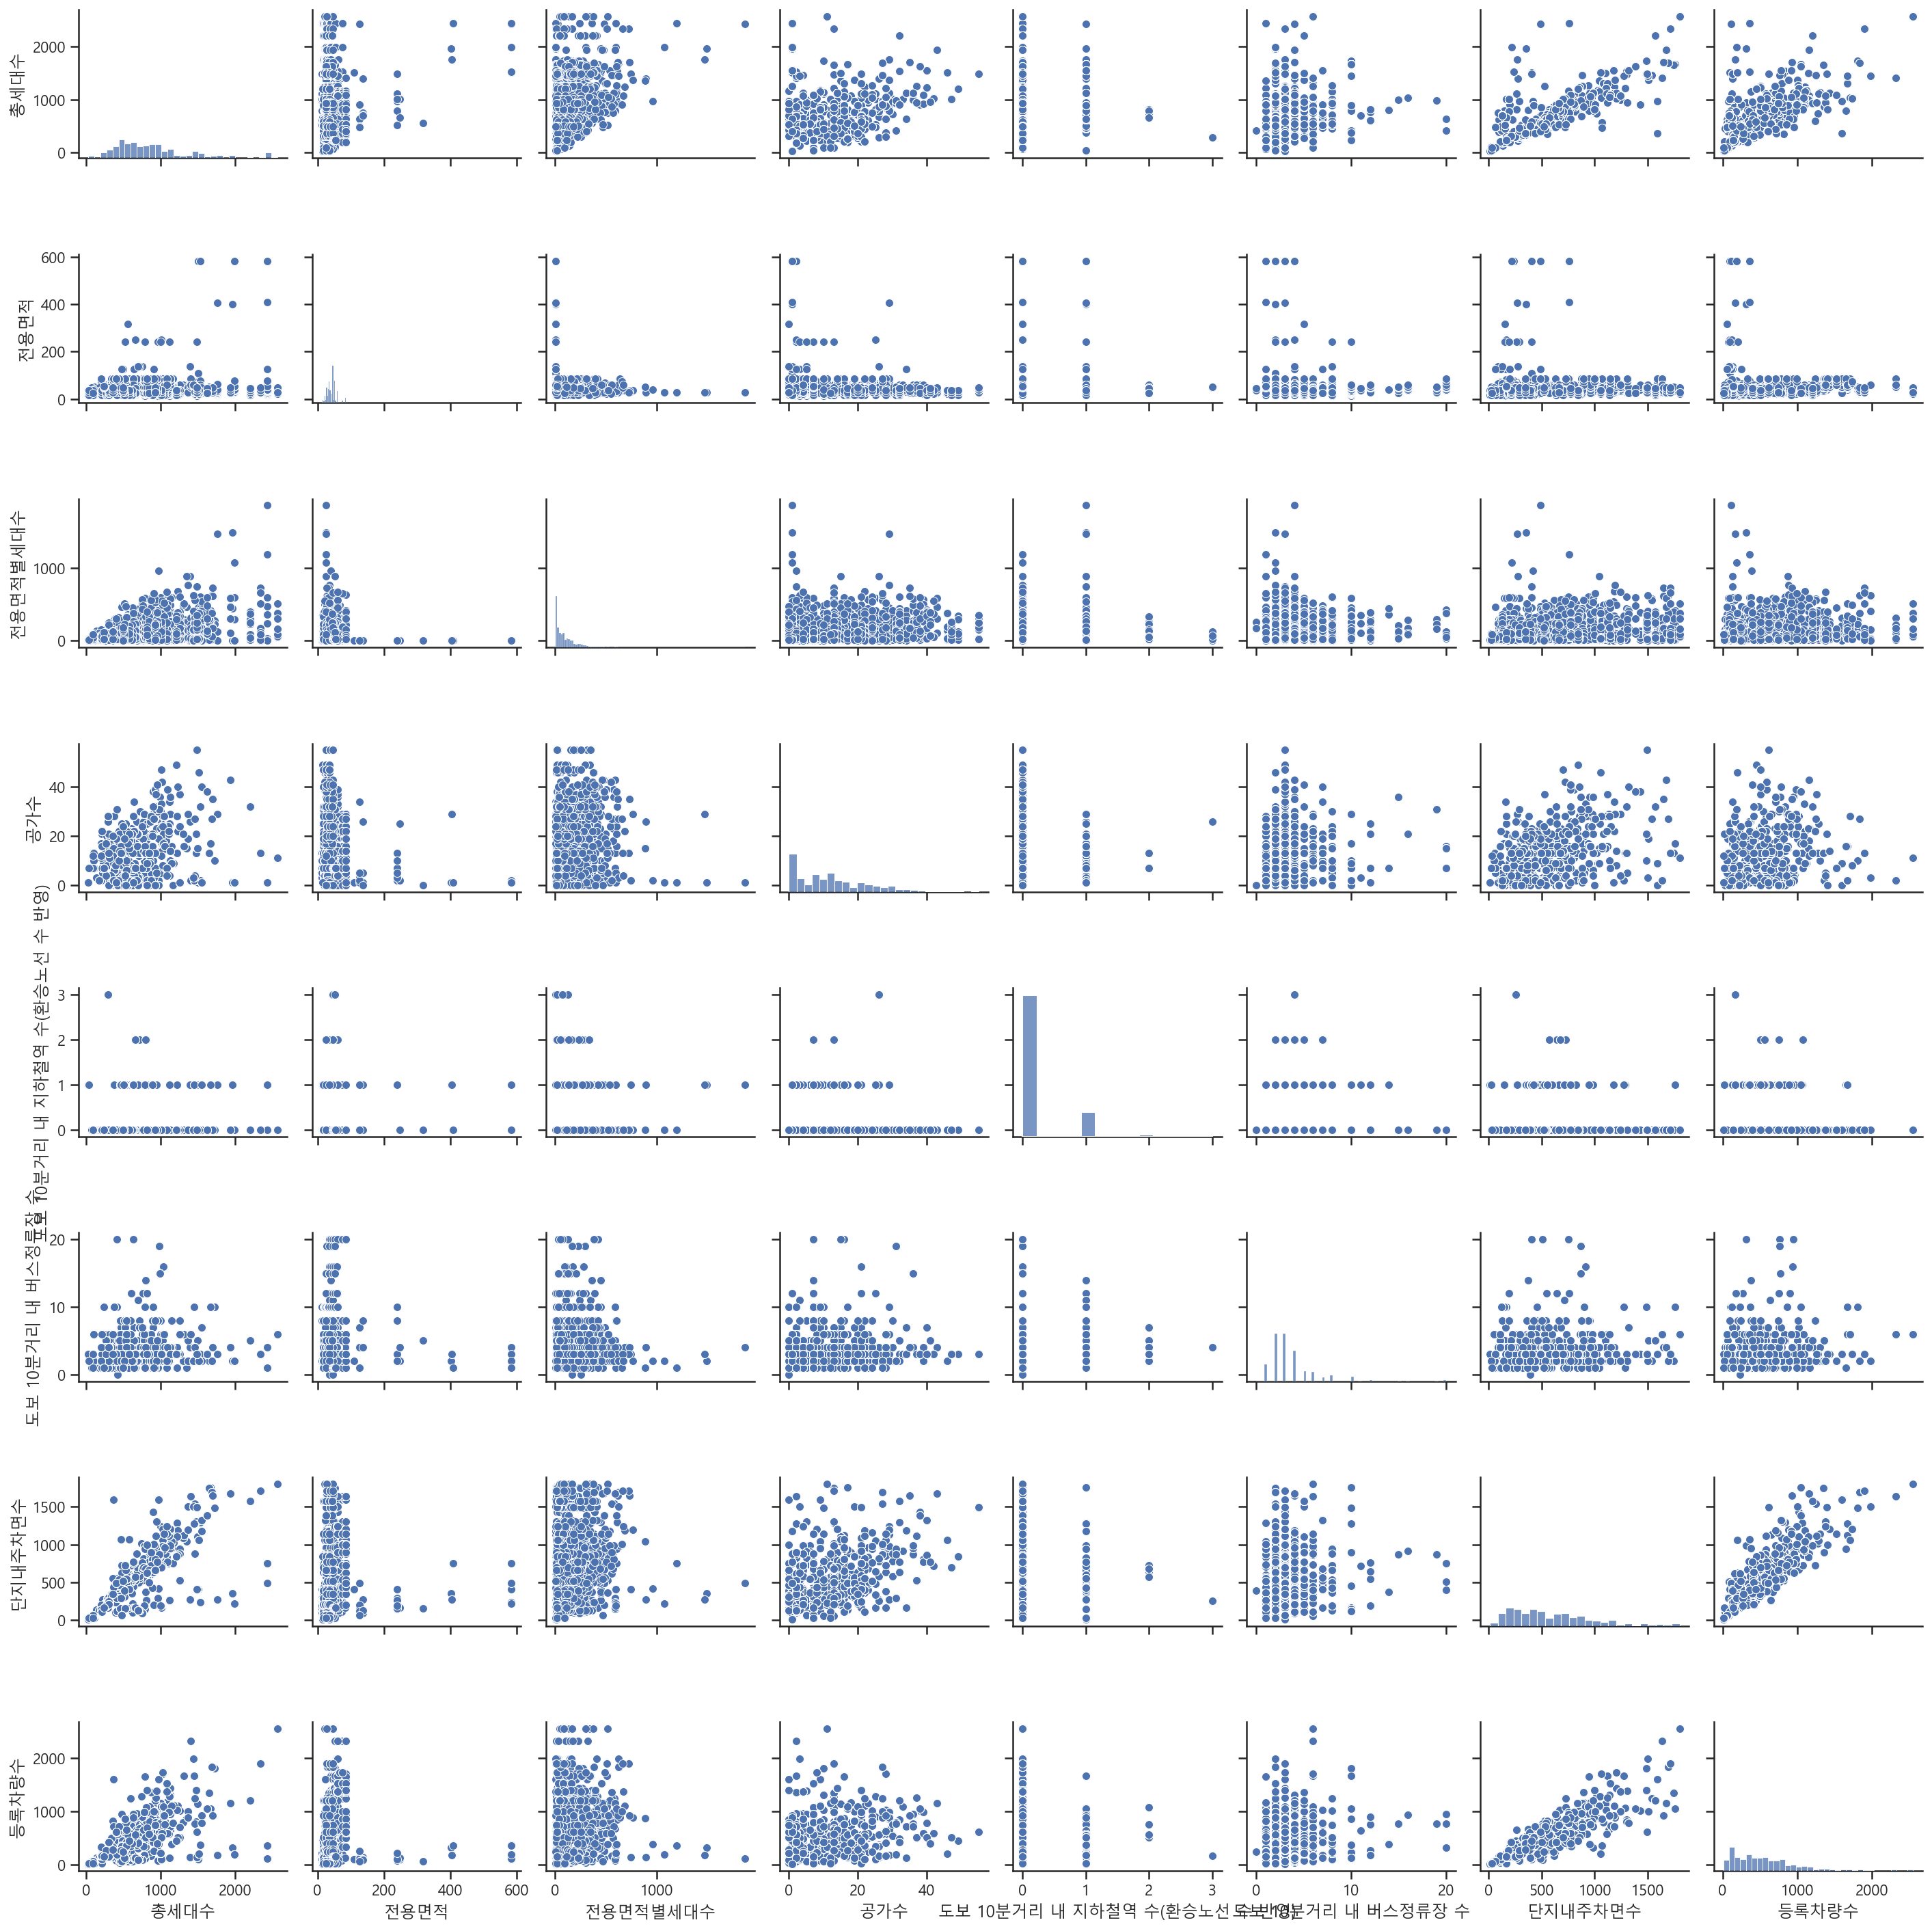

In [57]:
sns.pairplot(data=df)
plt.show()

In [58]:
# col = ['총세대수','전용면적','전용면적별세대수','공가수','도보 10분거리 내 지하철역 수(환승노선 수 반영)','도보 10분거리 내 버스정류장 수',
#        '단지내주차면수','등록차량수']

# for i in range(len(col)):
#     a = pd.DataFrame(df[col[i]].value_counts())
#     sns.barplot(data = a)
#     plt.title(col[i])
#     plt.show()

In [60]:
df['주차수요차이'] = df['단지내주차면수']-df['등록차량수']
df

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수,주차수요차이
0,C2483,900,아파트,경상북도,국민임대,39.72,134,38.0,A,15667000,103680,0.0,3.0,1425.0,1015.0,410.0
1,C2483,900,아파트,경상북도,국민임대,39.72,15,38.0,A,15667000,103680,0.0,3.0,1425.0,1015.0,410.0
2,C2483,900,아파트,경상북도,국민임대,51.93,385,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0,410.0
3,C2483,900,아파트,경상북도,국민임대,51.93,15,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0,410.0
4,C2483,900,아파트,경상북도,국민임대,51.93,41,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0,410.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2947,C2532,239,아파트,강원도,국민임대,49.20,19,7.0,A,11346000,116090,0.0,1.0,166.0,146.0,20.0
2948,C2532,239,아파트,강원도,국민임대,51.08,34,7.0,A,14005000,142310,0.0,1.0,166.0,146.0,20.0
2949,C2532,239,아파트,강원도,국민임대,51.73,34,7.0,A,14005000,142310,0.0,1.0,166.0,146.0,20.0
2950,C2532,239,아파트,강원도,국민임대,51.96,114,7.0,A,14005000,142310,0.0,1.0,166.0,146.0,20.0


In [61]:
df[df['주차수요차이']<0]
# 단지내 주차면보다 등록차량이 많은 경우 (소요가 공급보다 많은 경우)
# 공급이 과잉인 경우, 적절한 경우, 부족한 경우로 케이스를 나눠서 살펴보는 것도 좋을 것 같음. 

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수,주차수요차이
42,C1244,1722,아파트,경기도,국민임대,39.62,275,10.0,A,29551000,203030,0.0,10.0,1483.0,1804.0,-321.0
43,C1244,1722,아파트,경기도,국민임대,39.62,126,10.0,A,29551000,203030,0.0,10.0,1483.0,1804.0,-321.0
44,C1244,1722,아파트,경기도,국민임대,39.62,168,10.0,A,29551000,203030,0.0,10.0,1483.0,1804.0,-321.0
45,C1244,1722,아파트,경기도,국민임대,39.72,219,10.0,A,29551000,203030,0.0,10.0,1483.0,1804.0,-321.0
46,C1244,1722,아파트,경기도,국민임대,46.73,98,10.0,A,43990000,304540,0.0,10.0,1483.0,1804.0,-321.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2907,C2186,924,아파트,대구광역시,국민임대,29.34,38,0.0,H,-,-,0.0,8.0,664.0,744.0,-80.0
2908,C2186,924,아파트,대구광역시,국민임대,37.43,220,0.0,H,-,-,0.0,8.0,664.0,744.0,-80.0
2909,C2186,924,아파트,대구광역시,국민임대,46.51,188,0.0,H,25981000,248630,0.0,8.0,664.0,744.0,-80.0
2910,C2186,924,아파트,대구광역시,영구임대,26.37,219,0.0,C,13126000,105870,0.0,8.0,664.0,744.0,-80.0


# 데이터 분석 방향

### 1. 각 feature 별 특성 파악을 위한 기술통계량 추출
	- 기초 EDA 포함
    
### 2. null 값 포함 데이터 처리 방향

### 3. 주차수요/공급 적정 여부에 따른 케이스 구분
	- 단지내주차면수 공급이 적정한 경우
	- 공급 과잉인 경우
	- 공급 부족인 경우 

#### 1) 지역

In [20]:
col = list(df.columns)
col

['단지코드',
 '총세대수',
 '임대건물구분',
 '지역',
 '공급유형',
 '전용면적',
 '전용면적별세대수',
 '공가수',
 '자격유형',
 '임대보증금',
 '임대료',
 '도보 10분거리 내 지하철역 수(환승노선 수 반영)',
 '도보 10분거리 내 버스정류장 수',
 '단지내주차면수',
 '등록차량수']

In [75]:
df['지역'].value_counts()
# 지역 분포를 보면 서을에는 임대주택이 적은것인지 데이터가 많지 않음

경기도        621
경상남도       369
부산광역시      328
대전광역시      266
강원도        187
충청북도       163
충청남도       158
전라남도       151
광주광역시      141
경상북도       119
전라북도       109
대구광역시      102
제주특별자치도     91
서울특별시       64
세종특별자치시     47
울산광역시       36
Name: 지역, dtype: int64

In [97]:
temp = pd.DataFrame(df['지역'].value_counts())
temp

,지역
경기도,621
경상남도,369
부산광역시,328
대전광역시,266
강원도,187
충청북도,163
충청남도,158
전라남도,151
광주광역시,141
경상북도,119


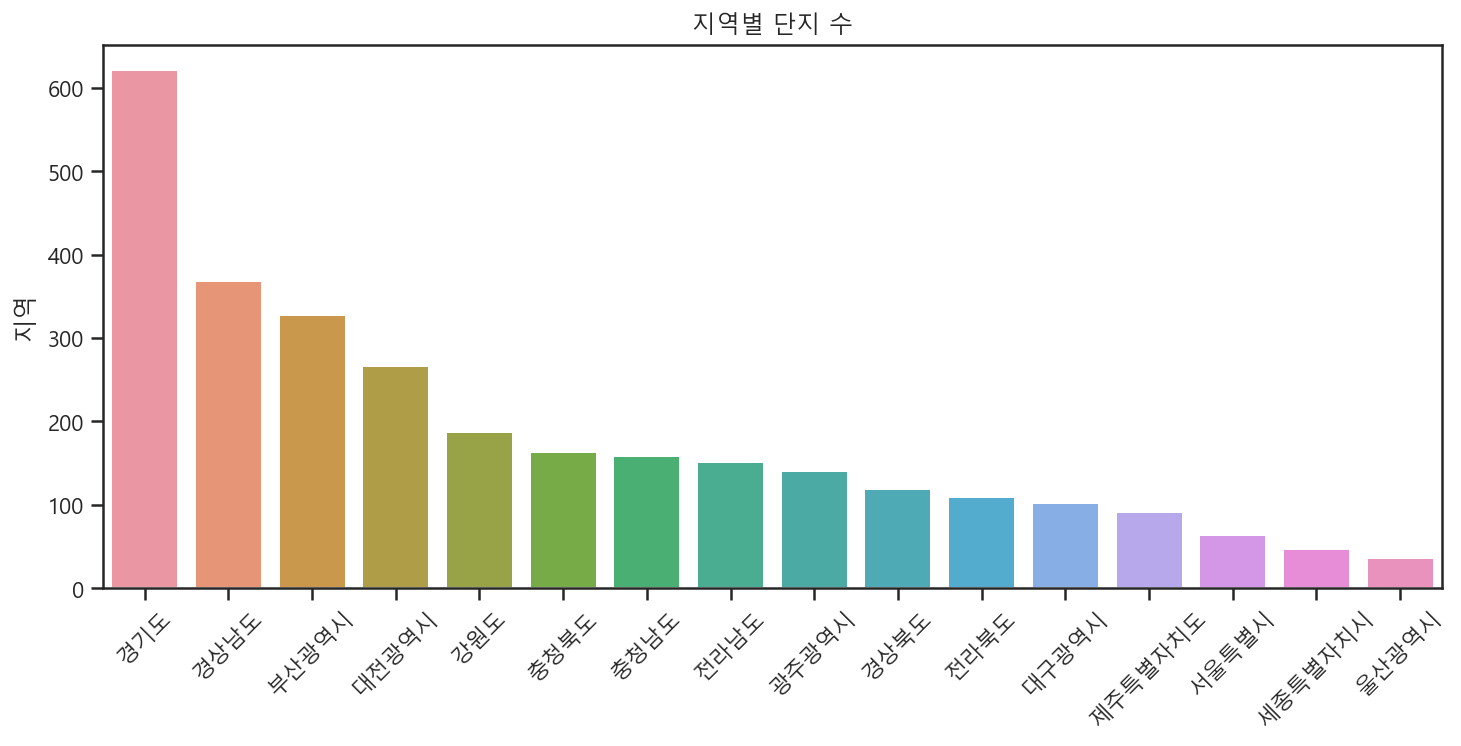

In [102]:
plt.figure(figsize=(12,5))
sns.barplot(data = temp, x = temp.index, y=temp['지역'])
plt.xticks(rotation=45)
plt.title('지역별 단지 수')
plt.show()

In [104]:
temp.index

'부산광역시'

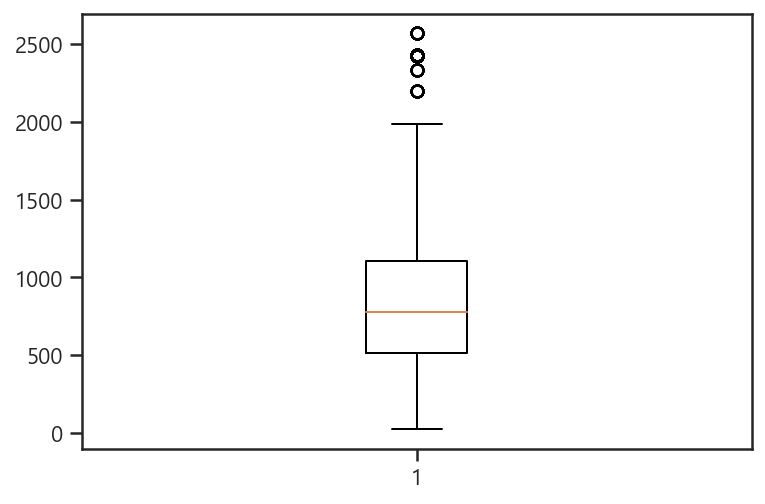

In [71]:
plt.boxplot(df['총세대수'])
plt.show()

In [12]:
df['자격유형'].value_counts()

A    1801
D     569
H     155
J     114
C      95
I      49
E      37
L      33
K      33
N      30
B      21
G       9
F       3
M       2
O       1
Name: 자격유형, dtype: int64